In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#important paths for data
#data_dir = '/home/ak30504/git_projects/m226/m226_final_proj/data/'
data_dir = './data/'

dataset1_path = data_dir + 'GSE132257/GSE132257_GEO_natural_log_TPM_matrix.txt'
dataset1_annotations_path = data_dir + 'GSE132257/GSE132257_processed_protocol_and_fresh_frozen_cell_annotation.txt'

dataset2_path = data_dir + 'GSE132465/GSE132465_GEO_processed_CRC_10X_natural_log_TPM_matrix.txt'
dataset2_annotations_path = data_dir + 'GSE132465/GSE132465_GEO_processed_CRC_10X_cell_annotation.txt'

dataset3_path = data_dir + 'GSE144735/GSE144735_processed_KUL3_CRC_10X_natural_log_TPM_matrix.txt'
dataset3_annotations_path = data_dir + 'GSE144735/GSE144735_processed_KUL3_CRC_10X_annotation.txt'

In [2]:
pwd

'/Users/benetoriol/Documents/PhD UCLA/Courses/MC226/project/m226_final_proj'

In [3]:
#load the annotations first
annotations1 = pd.read_csv(dataset1_annotations_path, header=0, sep='\t')
annotations2 = pd.read_csv(dataset2_annotations_path, header=0, sep='\t')
annotations3 = pd.read_csv(dataset3_annotations_path, header=0, sep='\t')

#count the number of normal and tumor cells in each dataset
counts1 = [annotations1['Class'].value_counts()[class_name] for class_name in annotations1['Class'].unique()]
counts2 = [annotations2['Class'].value_counts()[class_name] for class_name in annotations2['Class'].unique()]
counts3 = [annotations3['Class'].value_counts()[class_name] for class_name in annotations3['Class'].unique()]

classes_counts1 = dict(zip(annotations1['Class'].unique(), counts1))
print(classes_counts1)
classes_counts2 = dict(zip(annotations2['Class'].unique(), counts2))
print(classes_counts2)
classes_counts3 = dict(zip(annotations3['Class'].unique(), counts3))
print(classes_counts3)

#we see that the third dataset also has 'border' cells. we want to separate these out, maybe not use them in our project.

#get the indices associated with normal and tumor cells
    #can use these indices to grab the appropriate columns of the datasets below
dataset1_normal_ixs = annotations1.index[annotations1['Class']=='Normal'].values
dataset1_tumor_ixs = annotations1.index[annotations1['Class']=='Tumor'].values

dataset2_normal_ixs = annotations2.index[annotations2['Class']=='Normal'].values
dataset2_tumor_ixs = annotations2.index[annotations2['Class']=='Tumor'].values

dataset3_normal_ixs = annotations3.index[annotations3['Class']=='Normal'].values
dataset3_tumor_ixs = annotations3.index[annotations3['Class']=='Tumor'].values

{'Normal': 7686, 'Tumor': 10723}
{'Tumor': 47285, 'Normal': 16404}
{'Tumor': 8254, 'Border': 9424, 'Normal': 9736}


In [10]:
#we also want to see how many different types of cells we have: B cells, fibroblasts, mast cells, etc:
    #and the counts of each. if for example, we have thousands of T cells, and many examples of both
    #tumor and normal T cells, we should see if we can train a classifier just on this subset, as the
    #gene expression data should be much more similar/usable.

{'T cells': 7172, 'B cells': 4214, 'Stromal cells': 953, 'Epithelial cells': 4507, 'Myeloids': 1193, 'Mast cells': 239, 'Unspecified': 131}
{'Epithelial cells': 18539, 'Stromal cells': 5933, 'Myeloids': 6769, 'T cells': 23115, 'B cells': 9146, 'Mast cells': 187}
{'Epithelial cells': 6168, 'Stromal cells': 7650, 'Myeloids': 2676, 'T cells': 5770, 'B cells': 4902, 'Mast cells': 248}


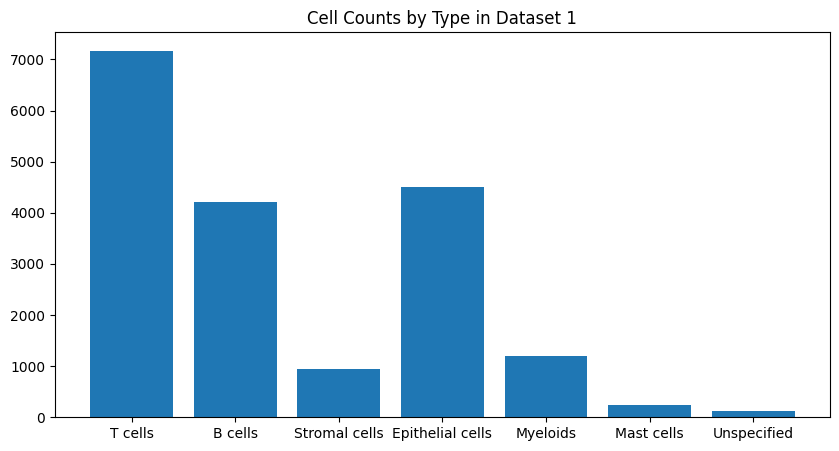

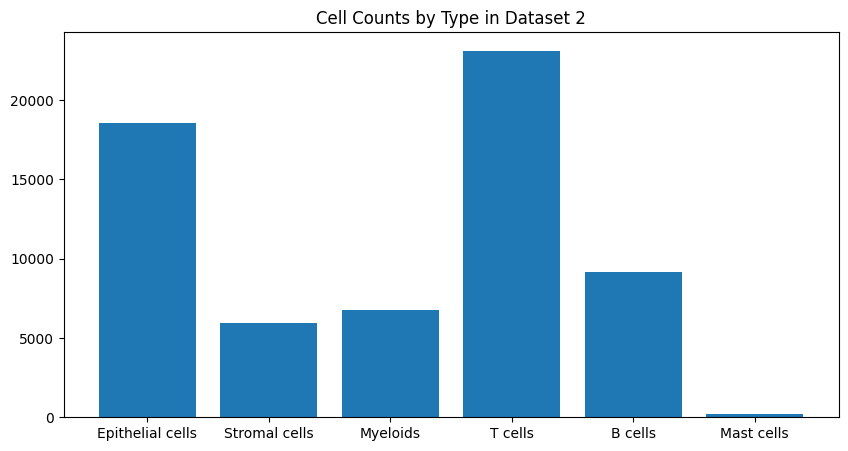

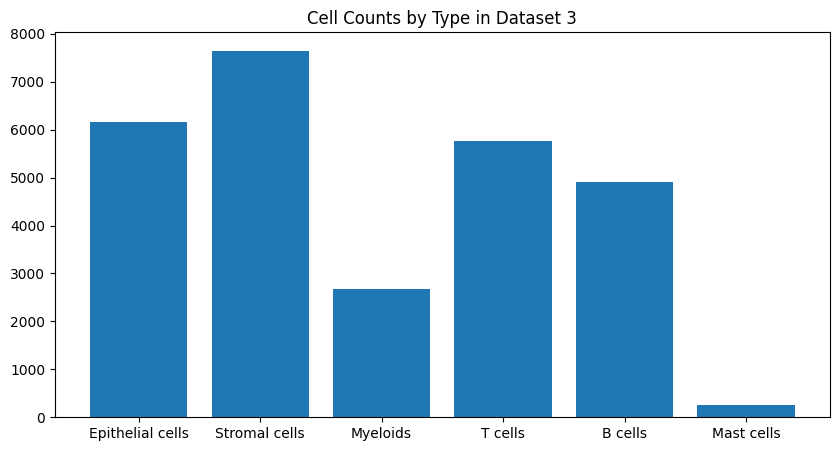

In [11]:
counts1 = [annotations1['Cell_type'].value_counts()[class_name] for class_name in annotations1['Cell_type'].unique()]
counts2 = [annotations2['Cell_type'].value_counts()[class_name] for class_name in annotations2['Cell_type'].unique()]
counts3 = [annotations3['Cell_type'].value_counts()[class_name] for class_name in annotations3['Cell_type'].unique()]

celltypes_counts1 = dict(zip(annotations1['Cell_type'].unique(), counts1))
print(celltypes_counts1)
celltypes_counts2 = dict(zip(annotations2['Cell_type'].unique(), counts2))
print(celltypes_counts2)
celltypes_counts3 = dict(zip(annotations3['Cell_type'].unique(), counts3))
print(celltypes_counts3)

#t_count = celltypes_counts1['T cells'] + celltypes_counts2['T cells'] + celltypes_counts3['T cells']
fig = plt.figure(figsize=(10,5))
plt.bar(range(len(celltypes_counts1)), list(celltypes_counts1.values()), align='center')
plt.xticks(range(len(celltypes_counts1)), list(celltypes_counts1.keys()))
plt.title('Cell Counts by Type in Dataset 1')
plt.show()

fig = plt.figure(figsize=(10,5))
plt.bar(range(len(celltypes_counts2)), list(celltypes_counts2.values()), align='center')
plt.xticks(range(len(celltypes_counts2)), list(celltypes_counts2.keys()))
plt.title('Cell Counts by Type in Dataset 2')
plt.show()

fig = plt.figure(figsize=(10,5))
plt.bar(range(len(celltypes_counts3)), list(celltypes_counts3.values()), align='center')
plt.xticks(range(len(celltypes_counts3)), list(celltypes_counts3.keys()))
plt.title('Cell Counts by Type in Dataset 3')
plt.show()

In [12]:
#What's the conclusion here? We have ~15k Stromal cells,
    #~30k epithelial cells, ~40k T cells, ~19k B cells across the three datasets.
    #I would think that with any of these subgroups we could train a classifier or do a UMAP.

In [ ]:
#dataset1 = pd.read_csv(dataset1_path, header=0, sep='\t')
#looks like the rows are genes, with the gene name appearing as the index. The subsequent columns are the cells,
    #and the values below each cell are the expression levels. This appears to be a fairly sparse set,
    #that is, most of the expression values for each gene are zero

#let's load the other two - these all take a long time to load. don't do this if you don't have many GBs of RAM
dataset2 = pd.read_csv(dataset2_path, header=0, sep='\t')
dataset3 = pd.read_csv(dataset3_path, header=0, sep='\t')

In [ ]:
#I'm also worried about sparsity of the datasets - it appears that many of the values in each gene expression
    #matrix are = 0. Let's look into this more deeply and get a sense of it
    #What is the distribution of the number of non-zero values in each column (cell)?

In [ ]:
nonzero_vals1 = []
nonzero_vals2 = []
nonzero_vals3 = []

#in dataset 1, for each column
for col in dataset1.columns:
    #print(dataset1[col][0])
    #skip the first column bc it's the names of the genes
    if dataset1[col][0] == 'RP11-34P13.3':
        continue
    #now count the number of non-zero values
    nonzero_vals1.append(np.count_nonzero(dataset1[col]))
    
for col in dataset2.columns:
    #print(dataset1[col][0])
    #skip the first column bc it's the names of the genes
    if dataset2[col][0] == 'A1BG':
        continue
    #now count the number of non-zero values
    nonzero_vals2.append(np.count_nonzero(dataset2[col]))
    
for col in dataset3.columns:
    #print(dataset1[col][0])
    #skip the first column bc it's the names of the genes
    if dataset3[col][0] == 'RP11-34P13.3':
        continue
    #now count the number of non-zero values
    nonzero_vals3.append(np.count_nonzero(dataset3[col]))
    
plt.figure(figsize=(8, 6))
sns.histplot(data=nonzero_vals1, bins=50)
plt.title('distribution of genes with non-zero expression for cells in dataset 1')
plt.xlabel('number of genes with non-zero expression')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=nonzero_vals2, bins=50)
plt.title('distribution of genes with non-zero expression for cells in dataset 2')
plt.xlabel('number of genes with non-zero expression')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=nonzero_vals3, bins=50)
plt.title('distribution of genes with non-zero expression for cells in dataset 3')
plt.xlabel('number of genes with non-zero expression')
plt.show()